## This file implements visualizations for the ratings collected in the project.

### Install Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Load Data for all ranking sets (dev, tst, train) a single base

In [2]:
# List of CSV file paths
folder_path = "rankings"
file_paths = ['dev_rankings.csv', 'train_rankings.csv', 'tst_rankings.csv']

# Initialize an empty list to store the DataFrames
dataframes = []

# Read each CSV file and append to the list
for file in file_paths:
    df = pd.read_csv(folder_path + "/" + file)
    dataframes.append(df)

# Concatenate the DataFrames row-wise
df_rankings = pd.concat(dataframes, ignore_index=True)

### Add Length of the source language strings

In [44]:
folder_path = "data"
file_paths = ['dev.csv', 'train.csv', 'tst.csv']

# Initialize an empty list to store the DataFrames
dataframes = []

# Read each CSV file and append to the list
for file in file_paths:
    df = pd.read_csv(folder_path + "/" + file)
    dataframes.append(df)

# Concatenate the DataFrames row-wise
df_src = pd.concat(dataframes, ignore_index=True)

In [50]:
df_rankings['num_tokens'] = df_src['context'].apply(lambda x: len(x.split())) +\
                            df_src['question'].apply(lambda x: len(x.split())) +\
                            df_src['answerA'].apply(lambda x: len(x.split())) +\
                            df_src['answerB'].apply(lambda x: len(x.split())) +\
                            df_src['answerC'].apply(lambda x: len(x.split()))

In [51]:
df_rankings

,Unnamed: 0,MarianMT,Unicamp_T5,NLLB_1.3b,num_tokens
0,0,85,75,80,31
1,1,90,85,80,39
2,2,95,70,100,28
3,3,85,80,90,55
4,4,75,70,80,31
...,...,...,...,...,...
29173,2219,85,75,70,33
29174,2220,85,70,90,26
29175,2221,65,50,75,34
29176,2222,90,85,95,39


### Kernel Density Estimates (KDE) for the Model Rankings

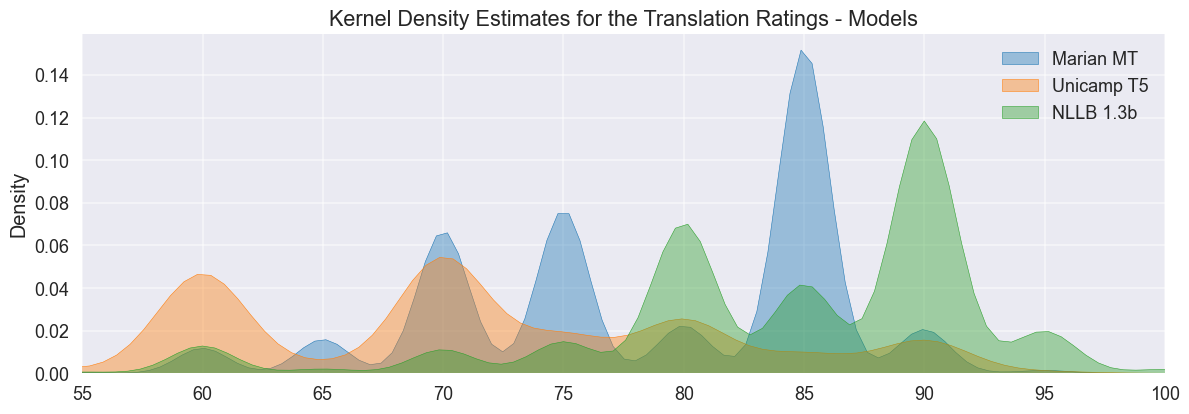

In [43]:
plt.figure(figsize=(12, 4))
plt.style.use('seaborn-v0_8-talk')
plt.grid(True, alpha=0.5)

sns.kdeplot(data=df_rankings, x='MarianMT', label='Marian MT', fill=True, alpha=0.4)
sns.kdeplot(data=df_rankings, x='Unicamp_T5', label='Unicamp T5', fill=True, alpha=0.4)
sns.kdeplot(data=df_rankings, x='NLLB_1.3b', label='NLLB 1.3b', fill=True, alpha=0.4)

plt.xlim(left=55)
plt.xlim(right=100)
plt.xlabel("")

plt.legend()

plt.tight_layout()
plt.title('Kernel Density Estimates for the Translation Ratings - Models')
plt.show()

### Model Performance per total sentence length

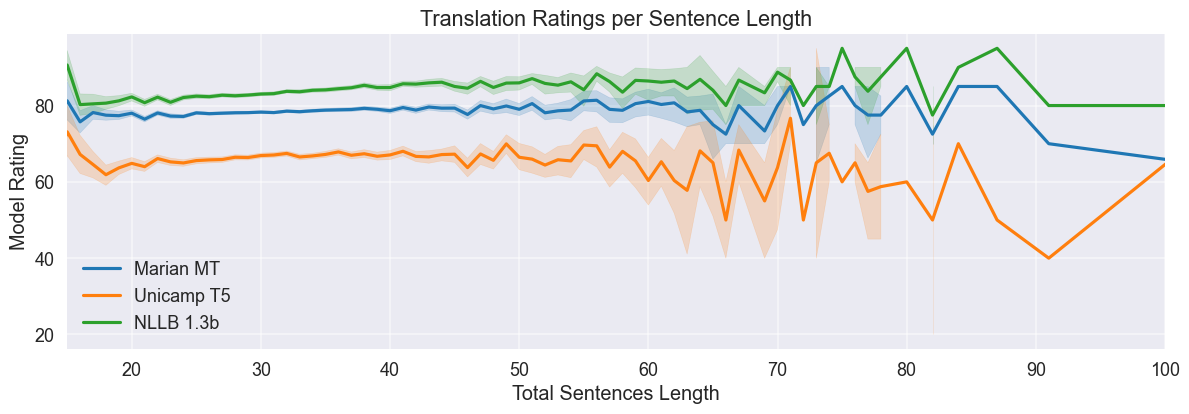

In [61]:
plt.figure(figsize=(12, 4))
plt.style.use('seaborn-v0_8-talk')
plt.grid(True, alpha=0.5)

sns.lineplot(data=df_rankings, y='MarianMT', label = 'Marian MT', x='num_tokens')
sns.lineplot(data=df_rankings, y='Unicamp_T5', label = 'Unicamp T5', x='num_tokens')
sns.lineplot(data=df_rankings, y='NLLB_1.3b', label = 'NLLB 1.3b', x='num_tokens')


plt.xlim(left=15)
plt.xlim(right=100)
plt.xlabel("Total Sentences Length")
plt.ylabel("Model Rating")

plt.legend()

plt.tight_layout()
plt.title('Translation Ratings per Sentence Length')
plt.show()